In [1]:
# all imports will be in this cell 

import pandas as pd
import string
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
porter_stemmer=PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\George\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\George\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data=pd.read_excel("commodities_dataset_annotated.xlsx")
data

,No,Classes,Text
0,1,BAD,Copper prices plunged to their lowest level in...
1,2,BAD,Oil plunged more than 6 per cent for the secon...
2,3,NEUTRAL,President Joe Biden will call on Congress to e...
3,4,BAD,The chief executive of Kuwait’s state oil comp...
4,5,GOOD,Oil climbed as financial markets recovered fro...
...,...,...,...
496,497,BAD,Europe appears to be on the brink of an energy...
497,498,NEUTRAL,The two countries appear to have been chosen c...
498,499,NEUTRAL,Current negotiations between Russia and the Tu...
499,500,GOOD,An economy with strong fundamentals is one tha...


In [3]:
# helper functions - all helper functions will be reported here

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

def tokenization(text):
    tokens = re.split('W+', text)
    return tokens

def remove_stopwords(text):
    output= [i for i in text if not i in stopwords]
    return output

def stemming(text):
    stem_text=[porter_stemmer.stem(word) for word in text]
    return stem_text

def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

In [4]:
# data preprocess

# remove punctuation from Text column - create a new column 
data['clean_msg']=data['Text'].apply(lambda x:remove_punctuation(x))

# lower all letters - create a new column 
data['msg_lower']=data['clean_msg'].apply(lambda x: x.lower())

import gensim
data['no_stopwords']=data['msg_lower'].apply(gensim.utils.simple_preprocess)

# tokenize all rows - create a new column 
#data['msg_tokenied']= data['msg_lower'].apply(lambda x: tokenization(x))

# remove stopwords - create a new column
data['no_stopwords2']=data['no_stopwords'].apply(lambda x:remove_stopwords(x))

# stemme texts - create a new column
data['msg_stemmed']=data['no_stopwords2'].apply(lambda x:stemming(x))

# lemmatize texts - create a new column
data['msg_lemmatized']=data['msg_stemmed'].apply(lambda x:lemmatizer(x))

data['msg_lemmatized_string']=data['msg_lemmatized'].apply(lambda x: ' '.join(map(str, x)))

data.head()

,No,Classes,Text,clean_msg,msg_lower,no_stopwords,no_stopwords2,msg_stemmed,msg_lemmatized,msg_lemmatized_string
0,1,BAD,Copper prices plunged to their lowest level in...,Copper prices plunged to their lowest level in...,copper prices plunged to their lowest level in...,"[copper, prices, plunged, to, their, lowest, l...","[copper, prices, plunged, lowest, level, year,...","[copper, price, plung, lowest, level, year, we...","[copper, price, plung, lowest, level, year, we...",copper price plung lowest level year wednesday...
1,2,BAD,Oil plunged more than 6 per cent for the secon...,Oil plunged more than 6 per cent for the secon...,oil plunged more than 6 per cent for the secon...,"[oil, plunged, more, than, per, cent, for, the...","[oil, plunged, per, cent, second, time, less, ...","[oil, plung, per, cent, second, time, less, we...","[oil, plung, per, cent, second, time, le, week...",oil plung per cent second time le week concern...
2,3,NEUTRAL,President Joe Biden will call on Congress to e...,President Joe Biden will call on Congress to e...,president joe biden will call on congress to e...,"[president, joe, biden, will, call, on, congre...","[president, joe, biden, call, congress, enact,...","[presid, joe, biden, call, congress, enact, ga...","[presid, joe, biden, call, congress, enact, ga...",presid joe biden call congress enact gasolin t...
3,4,BAD,The chief executive of Kuwait’s state oil comp...,The chief executive of Kuwait’s state oil comp...,the chief executive of kuwait’s state oil comp...,"[the, chief, executive, of, kuwait, state, oil...","[chief, executive, kuwait, state, oil, company...","[chief, execut, kuwait, state, oil, compani, s...","[chief, execut, kuwait, state, oil, compani, s...",chief execut kuwait state oil compani said u p...
4,5,GOOD,Oil climbed as financial markets recovered fro...,Oil climbed as financial markets recovered fro...,oil climbed as financial markets recovered fro...,"[oil, climbed, as, financial, markets, recover...","[oil, climbed, financial, markets, recovered, ...","[oil, climb, financi, market, recov, last, wee...","[oil, climb, financi, market, recov, last, wee...",oil climb financi market recov last week rout ...


In [5]:
#  Data analysis 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [6]:
# TfId

v = TfidfVectorizer(token_pattern=r"\b\w+\b")
X = v.fit_transform(data['msg_lemmatized_string'])

y = data['Classes'].to_list()

print(X.toarray())
## pd.DataFrame(X).to_excel("TEMP.xlsx", index=False) # save a xlsx file to see the tokenized data


[[0.10703543 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [7]:
# split dataset

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3,random_state=4)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

  (0, 800)	0.34100162882274054
  (0, 2585)	0.3172950078019781
  (0, 2423)	0.3578217441167612
  (0, 2781)	0.28185562844476975
  (0, 299)	0.2194214198783914
  (0, 1306)	0.2637215764733745
  (0, 1001)	0.15831542407821567
  (0, 1598)	0.23385476616553325
  (0, 717)	0.1910348841168864
  (0, 707)	0.2021463005642938
  (0, 2696)	0.2637215764733745
  (0, 100)	0.23156162043166945
  (0, 3296)	0.1921702153529348
  (0, 1605)	0.22935502944567035
  (0, 2664)	0.1826681038438084
  (0, 2004)	0.23385476616553325
  (1, 850)	0.2761285658730104
  (1, 23)	0.2373551584060944
  (1, 455)	0.19378617772181017
  (1, 422)	0.24679761540991446
  (1, 886)	0.2373551584060944
  (1, 2539)	0.2296401092784935
  (1, 1092)	0.2174666649468185
  (1, 2363)	0.24679761540991446
  (1, 999)	0.22311712818490614
  :	:
  (348, 103)	0.13009004763690107
  (349, 1340)	0.24779295788608666
  (349, 1635)	0.24779295788608666
  (349, 2726)	0.22711007488502544
  (349, 2878)	0.22711007488502544
  (349, 3205)	0.21972803441505054
  (349, 875)	0.23

Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.62
F1-Score: 0.614
Precision: 0.638
Recall: 0.623


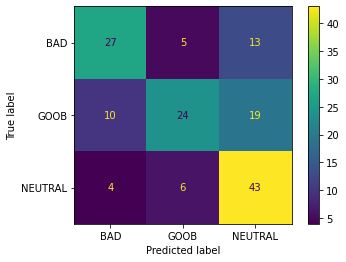

In [8]:
svm = SVC().fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))
print('F1-Score: %.3f'%f1_score(y_test, y_pred, average="weighted"))
print('Precision: %.3f'%precision_score(y_test, y_pred, average="weighted"))
print('Recall: %.3f'%recall_score(y_test, y_pred, average="weighted"))
conf_mat = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(conf_mat, display_labels=['BAD', 'GOOB', 'NEUTRAL'])
cmd.plot()

In [9]:
param_dist={
    'C':[0.5,1.0,2.0, 3.0],  # penalty parameter C of the error term
    "kernel":['linear','poly','rbf','sigmoid'], # specifies the kernel type to be used in the algorithm  
    'gamma':[0.02, 0.08,0.2,1.0]
}

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
grid=GridSearchCV(svm,param_grid=param_dist,cv=5,n_jobs=-1)

In [12]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.5, 1.0, 2.0, 3.0],
                         'gamma': [0.02, 0.08, 0.2, 1.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [13]:
grid.best_estimator_

SVC(gamma=1.0, kernel='sigmoid')

In [14]:
grid.best_score_

0.6285714285714286

In [15]:
grid.best_params_

{'C': 1.0, 'gamma': 1.0, 'kernel': 'sigmoid'}

In [18]:
svm = SVC(C=1.0, gamma=1.0, kernel='sigmoid')

In [19]:
scoring = ['accuracy','f1_macro','precision_macro', 'recall_macro']
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scores = cross_validate(svm, X, y, cv=5,scoring=scoring)
scores

{'fit_time': array([0.03194118, 0.04088831, 0.04388046, 0.0438838 , 0.04291344]),
 'score_time': array([0.01197052, 0.00898743, 0.00898314, 0.00896788, 0.00897408]),
 'test_accuracy': array([0.56435644, 0.58      , 0.68      , 0.66      , 0.62      ]),
 'test_f1_macro': array([0.56641032, 0.5801079 , 0.67383357, 0.65130905, 0.61443384]),
 'test_precision_macro': array([0.58204004, 0.60281667, 0.68159633, 0.6774252 , 0.66642925]),
 'test_recall_macro': array([0.56387403, 0.5802139 , 0.67825312, 0.6580511 , 0.6218063 ])}

In [29]:
data2=pd.read_excel("commodities_merged.xlsx")
data2

,Text,Date,Year
0,"4/4\n© Reuters. Gary Millershaski, a farmer an...",May 31,2022
1,3/3\n© Reuters. FILE PHOTO: A view of the Exxo...,May 31,2022
2,© Reuters.\n\nBy Peter Nurse \n\nInvesting.c...,May 31,2022
3,© Reuters.\n\nBy Gina Lee\n\nInvesting.com – O...,May 31,2022
4,© Reuters.\n\nBy Barani Krishnan\n\nInvesting....,May 31,2022
...,...,...,...
38944,* Corn jumps on talk of China's purchases of L...,Nov 15,2010
38945,"* Euro zone debt back in focus, eyes on G20\n ...",Nov 09,2010
38946,"* Soy, wheat futures up half pct on Fed move\n...",Nov 04,2010
38947,"* Soy up 1 pct, wheat rises 0.8 pct on Fed mov...",Nov 04,2010


In [30]:
data2['Text'] = data2['Text'].astype(str)
data2

,Text,Date,Year
0,"4/4\n© Reuters. Gary Millershaski, a farmer an...",May 31,2022
1,3/3\n© Reuters. FILE PHOTO: A view of the Exxo...,May 31,2022
2,© Reuters.\n\nBy Peter Nurse \n\nInvesting.c...,May 31,2022
3,© Reuters.\n\nBy Gina Lee\n\nInvesting.com – O...,May 31,2022
4,© Reuters.\n\nBy Barani Krishnan\n\nInvesting....,May 31,2022
...,...,...,...
38944,* Corn jumps on talk of China's purchases of L...,Nov 15,2010
38945,"* Euro zone debt back in focus, eyes on G20\n ...",Nov 09,2010
38946,"* Soy, wheat futures up half pct on Fed move\n...",Nov 04,2010
38947,"* Soy up 1 pct, wheat rises 0.8 pct on Fed mov...",Nov 04,2010


In [31]:
# data preprocess

# remove punctuation from Text column - create a new column 
data2['clean_msg']=data2['Text'].apply(lambda x:remove_punctuation(x))

# lower all letters - create a new column 
data2['msg_lower']=data2['clean_msg'].apply(lambda x: x.lower())

import gensim
data2['no_stopwords']=data2['msg_lower'].apply(gensim.utils.simple_preprocess)

# tokenize all rows - create a new column 
#data['msg_tokenied']= data['msg_lower'].apply(lambda x: tokenization(x))

# remove stopwords - create a new column
data2['no_stopwords2']=data2['no_stopwords'].apply(lambda x:remove_stopwords(x))

# stemme texts - create a new column
data2['msg_stemmed']=data2['no_stopwords2'].apply(lambda x:stemming(x))

# lemmatize texts - create a new column
data2['msg_lemmatized']=data2['msg_stemmed'].apply(lambda x:lemmatizer(x))

data2['msg_lemmatized_string']=data2['msg_lemmatized'].apply(lambda x: ' '.join(map(str, x)))

data2.head()

,Text,Date,Year,clean_msg,msg_lower,no_stopwords,no_stopwords2,msg_stemmed,msg_lemmatized,msg_lemmatized_string
0,"4/4\n© Reuters. Gary Millershaski, a farmer an...",May 31,2022,44\n© Reuters Gary Millershaski a farmer and s...,44\n© reuters gary millershaski a farmer and s...,"[reuters, gary, millershaski, farmer, and, sco...","[reuters, gary, millershaski, farmer, scout, w...","[reuter, gari, millershaski, farmer, scout, wh...","[reuter, gari, millershaski, farmer, scout, wh...",reuter gari millershaski farmer scout wheat qu...
1,3/3\n© Reuters. FILE PHOTO: A view of the Exxo...,May 31,2022,33\n© Reuters FILE PHOTO A view of the ExxonMo...,33\n© reuters file photo a view of the exxonmo...,"[reuters, file, photo, view, of, the, exxonmob...","[reuters, file, photo, view, exxonmobil, baton...","[reuter, file, photo, view, exxonmobil, baton,...","[reuter, file, photo, view, exxonmobil, baton,...",reuter file photo view exxonmobil baton roug r...
2,© Reuters.\n\nBy Peter Nurse \n\nInvesting.c...,May 31,2022,© Reuters\n\nBy Peter Nurse \n\nInvestingcom...,© reuters\n\nby peter nurse \n\ninvestingcom...,"[reuters, by, peter, nurse, investingcom, oil,...","[reuters, peter, nurse, investingcom, oil, pri...","[reuter, peter, nurs, investingcom, oil, price...","[reuter, peter, nurs, investingcom, oil, price...",reuter peter nurs investingcom oil price push ...
3,© Reuters.\n\nBy Gina Lee\n\nInvesting.com – O...,May 31,2022,© Reuters\n\nBy Gina Lee\n\nInvestingcom – Oil...,© reuters\n\nby gina lee\n\ninvestingcom – oil...,"[reuters, by, gina, lee, investingcom, oil, wa...","[reuters, gina, lee, investingcom, oil, tuesda...","[reuter, gina, lee, investingcom, oil, tuesday...","[reuter, gina, lee, investingcom, oil, tuesday...",reuter gina lee investingcom oil tuesday morn ...
4,© Reuters.\n\nBy Barani Krishnan\n\nInvesting....,May 31,2022,© Reuters\n\nBy Barani Krishnan\n\nInvestingco...,© reuters\n\nby barani krishnan\n\ninvestingco...,"[reuters, by, barani, krishnan, investingcom, ...","[reuters, barani, krishnan, investingcom, oil,...","[reuter, barani, krishnan, investingcom, oil, ...","[reuter, barani, krishnan, investingcom, oil, ...",reuter barani krishnan investingcom oil consum...


In [32]:
X2 = v.transform(data2['msg_lemmatized_string'])
print(X2)

  (0, 3523)	0.058253971238681736
  (0, 3521)	0.018745089931024632
  (0, 3517)	0.046442194521062206
  (0, 3510)	0.02465155382960805
  (0, 3509)	0.06963272204316819
  (0, 3504)	0.0234927590263066
  (0, 3500)	0.04652976792167367
  (0, 3484)	0.13861332519393468
  (0, 3459)	0.6447135718941801
  (0, 3457)	0.02628478337426295
  (0, 3455)	0.02465155382960805
  (0, 3443)	0.019417990412893913
  (0, 3436)	0.036337348108957244
  (0, 3425)	0.02465155382960805
  (0, 3420)	0.021238604426479363
  (0, 3417)	0.015654555730566656
  (0, 3416)	0.0469855180526132
  (0, 3325)	0.0234927590263066
  (0, 3324)	0.04934073780425717
  (0, 3296)	0.013239258055470245
  (0, 3294)	0.10106633193228848
  (0, 3286)	0.029744975200250295
  (0, 3281)	0.019417990412893913
  (0, 3258)	0.0234927590263066
  (0, 3254)	0.02465155382960805
  :	:
  (38948, 737)	0.031230432554782524
  (38948, 731)	0.07416343683508876
  (38948, 717)	0.023575686213326456
  (38948, 677)	0.028577105838984717
  (38948, 668)	0.028577105838984717
  (38948, 

In [33]:
svm = SVC(C=1.0, gamma=1.0, kernel='sigmoid')
svm=svm.fit(X_train,y_train)
pred=svm.predict(X2)

In [34]:
pred

array(['NEUTRAL', 'NEUTRAL', 'GOOD', ..., 'BAD', 'BAD', 'BAD'],
      dtype='<U7')

In [35]:
data2['Sentiment']=pd.Series(pred)

In [36]:
data2

,Text,Date,Year,clean_msg,msg_lower,no_stopwords,no_stopwords2,msg_stemmed,msg_lemmatized,msg_lemmatized_string,Sentiment
0,"4/4\n© Reuters. Gary Millershaski, a farmer an...",May 31,2022,44\n© Reuters Gary Millershaski a farmer and s...,44\n© reuters gary millershaski a farmer and s...,"[reuters, gary, millershaski, farmer, and, sco...","[reuters, gary, millershaski, farmer, scout, w...","[reuter, gari, millershaski, farmer, scout, wh...","[reuter, gari, millershaski, farmer, scout, wh...",reuter gari millershaski farmer scout wheat qu...,NEUTRAL
1,3/3\n© Reuters. FILE PHOTO: A view of the Exxo...,May 31,2022,33\n© Reuters FILE PHOTO A view of the ExxonMo...,33\n© reuters file photo a view of the exxonmo...,"[reuters, file, photo, view, of, the, exxonmob...","[reuters, file, photo, view, exxonmobil, baton...","[reuter, file, photo, view, exxonmobil, baton,...","[reuter, file, photo, view, exxonmobil, baton,...",reuter file photo view exxonmobil baton roug r...,NEUTRAL
2,© Reuters.\n\nBy Peter Nurse \n\nInvesting.c...,May 31,2022,© Reuters\n\nBy Peter Nurse \n\nInvestingcom...,© reuters\n\nby peter nurse \n\ninvestingcom...,"[reuters, by, peter, nurse, investingcom, oil,...","[reuters, peter, nurse, investingcom, oil, pri...","[reuter, peter, nurs, investingcom, oil, price...","[reuter, peter, nurs, investingcom, oil, price...",reuter peter nurs investingcom oil price push ...,GOOD
3,© Reuters.\n\nBy Gina Lee\n\nInvesting.com – O...,May 31,2022,© Reuters\n\nBy Gina Lee\n\nInvestingcom – Oil...,© reuters\n\nby gina lee\n\ninvestingcom – oil...,"[reuters, by, gina, lee, investingcom, oil, wa...","[reuters, gina, lee, investingcom, oil, tuesda...","[reuter, gina, lee, investingcom, oil, tuesday...","[reuter, gina, lee, investingcom, oil, tuesday...",reuter gina lee investingcom oil tuesday morn ...,BAD
4,© Reuters.\n\nBy Barani Krishnan\n\nInvesting....,May 31,2022,© Reuters\n\nBy Barani Krishnan\n\nInvestingco...,© reuters\n\nby barani krishnan\n\ninvestingco...,"[reuters, by, barani, krishnan, investingcom, ...","[reuters, barani, krishnan, investingcom, oil,...","[reuter, barani, krishnan, investingcom, oil, ...","[reuter, barani, krishnan, investingcom, oil, ...",reuter barani krishnan investingcom oil consum...,BAD
...,...,...,...,...,...,...,...,...,...,...,...
38944,* Corn jumps on talk of China's purchases of L...,Nov 15,2010,Corn jumps on talk of Chinas purchases of Lat...,corn jumps on talk of chinas purchases of lat...,"[corn, jumps, on, talk, of, chinas, purchases,...","[corn, jumps, talk, chinas, purchases, latam, ...","[corn, jump, talk, china, purchas, latam, carg...","[corn, jump, talk, china, purchas, latam, carg...",corn jump talk china purchas latam cargo soy l...,BAD
38945,"* Euro zone debt back in focus, eyes on G20\n ...",Nov 09,2010,Euro zone debt back in focus eyes on G20\n T...,euro zone debt back in focus eyes on g20\n t...,"[euro, zone, debt, back, in, focus, eyes, on, ...","[euro, zone, debt, back, focus, eyes, traders,...","[euro, zone, debt, back, focu, eye, trader, ta...","[euro, zone, debt, back, focu, eye, trader, ta...",euro zone debt back focu eye trader target oun...,GOOD
38946,"* Soy, wheat futures up half pct on Fed move\n...",Nov 04,2010,Soy wheat futures up half pct on Fed move\n ...,soy wheat futures up half pct on fed move\n ...,"[soy, wheat, futures, up, half, pct, on, fed, ...","[soy, wheat, futures, half, pct, fed, move, gr...","[soy, wheat, futur, half, pct, fed, move, grai...","[soy, wheat, futur, half, pct, fed, move, grai...",soy wheat futur half pct fed move grain market...,BAD
38947,"* Soy up 1 pct, wheat rises 0.8 pct on Fed mov...",Nov 04,2010,Soy up 1 pct wheat rises 08 pct on Fed move\n...,soy up 1 pct wheat rises 08 pct on fed move\n...,"[soy, up, pct, wheat, rises, pct, on, fed, mov...","[soy, pct, wheat, rises, pct, fed, move, grain...","[soy, pct, wheat, rise, pct, fed, move, grain,...","[soy, pct, wheat, rise, pct, fed, move, grain,...",soy pct wheat rise pct fed move gr

In [37]:
file_name = 'tfidf_svc_index_comm.xlsx'
  
# saving the excelsheet
data2.to_excel(file_name)